✅ Model trained! MSE on test set: 127.93


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


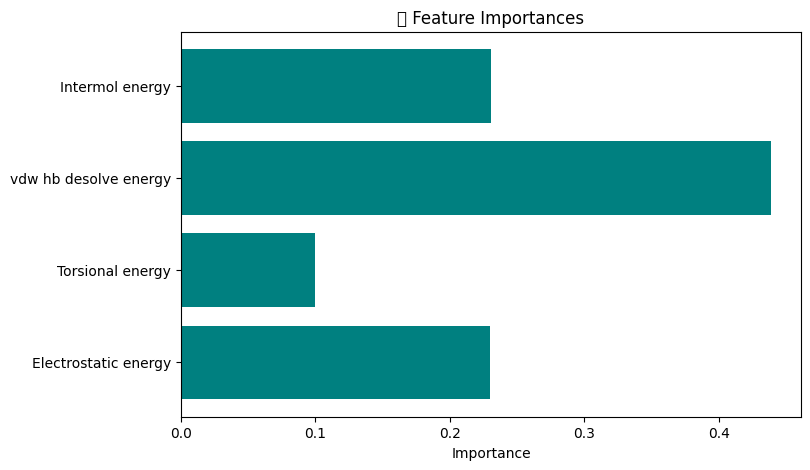

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import joblib
import matplotlib.pyplot as plt

# Load cleaned dataset
df = pd.read_csv("Cleaned_Autodock_Results .csv")

# Features and target
X = df[[
    'Electrostatic energy',
    'Torsional energy',
    'vdw hb desolve energy',
    'Intermol energy'
]]
y = df['binding energy']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict & evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f"✅ Model trained! MSE on test set: {mse:.2f}")

# Save model
joblib.dump(model, "model_with_importance.pkl")

# Plot feature importances
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(8,5))
plt.barh(features, importances, color='teal')
plt.xlabel("Importance")
plt.title("🔍 Feature Importances")
plt.show()
